<span style="color:grey"> By Seongchan Kang </span>

<span style="color:grey"> Version : Python 3.10.1 in Window </span>

- 출처 1 : (교재) 머신러닝 교과서 with 파이썬, 사이킷런, 텐서플로 
- 출처 2 : (교재) 비즈니스 애널리틱스를 위한 데이터 마이닝 R
- 출처 3 : (URL) <span> https://hyemin-kim.github.io/2020/08/04/S-Python-sklearn4/#4-%EC%95%99%EC%83%81%EB%B8%94-ensemble-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98 </span>
- 출처 4 : (라이브러리 문서) <span> https://scikit-learn.org/stable/index.html </span>

# 앙상블(Ensemble) 학습이란

여러 분류기를 하나의 분류기로 연결하여 개별 분류기보다 더 좋은 성능을 만드는 것을 목표로 하는 학습

결국 더 훌륭한 모델을 만들기 위한 방법

앙상블의 방법을 여러가지 존재, 아래에서 계속 소개


In [1]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 분할에 필요
from sklearn.model_selection import train_test_split

# 최적화 모델링에 필요한 라이브러리
from sklearn.model_selection import GridSearchCV

# 평가를 위한 라이브러리 설치
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, roc_curve, auc # 정확도, 민감도 등
from sklearn.model_selection import cross_val_score # Roc 관련

In [2]:
# 파일 불러오기
data = pd.read_csv("titanic_df.csv")
data = data.drop(labels = "Unnamed: 0", axis = 1)
data

,Sex,Embarked,ToH,Survived,Pclass,Age,Fare,Family
0,0,0,2,0,3,22,7.2500,0
1,1,1,3,1,1,38,71.2833,0
2,1,0,1,1,3,26,7.9250,0
3,1,0,3,1,1,35,53.1000,0
4,0,0,2,0,3,35,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,0,4,0,2,27,13.0000,0
887,1,0,1,1,1,19,30.0000,0
888,1,0,1,0,3,21,23.4500,1
889,0,1,2,1,1,26,30.0000,0


## 투표(Voting)

- 투표를 통해 최종 결과를 결정하는 방식
- 동일한 훈련 세트
- 여러가지 알고리즘을 사용
- 샘플을 뽑을 때 중복은 없음
- 싱글 모델은 튜플 형태로 정의
- 우선적으로 여러 모델을 쓰기 때문 여러 모델을 모델링하는 과정이 필요

### 투표(회귀) 실습

In [3]:
# 모델링을 위한 라이브러리 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# 앙상블을 위한 라이브러리
from sklearn.ensemble import VotingRegressor

#### 데이터 분할

In [4]:
# X, Y로 변수를 나누기(독립괴 종속 변수)
X = data[['Sex', 'Embarked', 'ToH', 'Pclass', 'Age', 'Fare', 'Family']]
Y = data['Survived']

# 훈련과 테스트로 변수 다시 한번더 나누기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

#### 각각의 모델 모델링

In [5]:
# LinearRegression #
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(X_train, Y_train)

print("모델 < LinearRegression >")
print("Train Set Score1 : {}".format(linear_reg.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(linear_reg.score(X_test, Y_test)))


# Ridge #
ridge = Ridge(alpha=1)
ridge.fit(X_train, Y_train)

print("\n모델 < Ridge >")
print("Train Set Score1 : {}".format(ridge.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(ridge.score(X_test, Y_test)))


# Lasso #
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, Y_train)

print("\n모델 < Lasso >")
print("Train Set Score1 : {}".format(lasso.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(lasso.score(X_test, Y_test)))


# Elasticnet #
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.2)
elasticnet.fit(X_train, Y_train)

print("\n모델 < Elasticnet >")
print("Train Set Score1 : {}".format(elasticnet.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(elasticnet.score(X_test, Y_test)))


# With Standard Scaling #
standard_elasticnet = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.5, l1_ratio=0.2)
)

standard_elasticnet.fit(X_train, Y_train).predict(X_test)

print("\n모델 < Standard Scaling >")
print("Train Set Score1 : {}".format(standard_elasticnet.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(standard_elasticnet.score(X_test, Y_test)))


# 2-Degree Polynomial Features + Standard Scaling #
poly_elasticnet = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.5, l1_ratio=0.2)
)

poly_elasticnet.fit(X_train, Y_train).predict(X_test)

print("\n모델 < Polynomial Features >")
print("Train Set Score1 : {}".format(standard_elasticnet.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(standard_elasticnet.score(X_test, Y_test)))

모델 < LinearRegression >
Train Set Score1 : 0.412743501945687
Test  Set Score1 : 0.4469100589743633

모델 < Ridge >
Train Set Score1 : 0.41272605586832933
Test  Set Score1 : 0.44706129922638593

모델 < Lasso >
Train Set Score1 : 0.4070524520311668
Test  Set Score1 : 0.4400268071967778

모델 < Elasticnet >
Train Set Score1 : 0.09146856345084353
Test  Set Score1 : 0.09870790220772885

모델 < Standard Scaling >
Train Set Score1 : 0.2347979407031423
Test  Set Score1 : 0.23998899563706144

모델 < Polynomial Features >
Train Set Score1 : 0.2347979407031423
Test  Set Score1 : 0.23998899563706144


#### Voting 모델링

In [6]:
# 설계된 모델 묶기 #
# 보팅에 참여한 single models 지정
single_models = [
    ('linear_reg', linear_reg),
    ('ridge', ridge),
    ('lasso', lasso),
    ('elasticnet', elasticnet),
    ('standard_elasticnet', standard_elasticnet),
    ('poly_elasticnet', poly_elasticnet)
]

In [7]:
# voting regressor 모델링
voting_regressor = VotingRegressor(single_models, n_jobs=-1)

# 학습
voting_regressor.fit(X_train, Y_train)

VotingRegressor(estimators=[('linear_reg', LinearRegression(n_jobs=-1)),
                            ('ridge', Ridge(alpha=1)),
                            ('lasso', Lasso(alpha=0.01)),
                            ('elasticnet', ElasticNet(alpha=0.5, l1_ratio=0.2)),
                            ('standard_elasticnet',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.5,
                                                         l1_ratio=0.2))])),
                            ('poly_elasticnet',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.5,
                                                         l1_ratio=0.2))]))],
                n_jobs=-1)

#### Voting 모델 평가

In [8]:
# 테스트 #
print("모델 < Ensemble_Voting >")
print("Train Set Score1 : {}".format(voting_regressor.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(voting_regressor.score(X_test, Y_test)))

## 단일의 모델보다는 결과가 좋긴함
## 하지만 몇몇의 단일 모델이 성능이 더 좋아보임 

모델 < Ensemble_Voting >
Train Set Score1 : 0.3595280346322728
Test  Set Score1 : 0.38502139293446314


### 투표(분류) 실습

- 투표에 분률 할 때는 투표 방식을 soft로 할것인지, hard로 할 것 인지도 중요
- voting ='soft', 'hard'
- KNN도 있기 때문에 정규화도 진행

In [9]:
# 라이브러리 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier

#### 데이터 전처리 및 분할

In [10]:
# 함수 선언 #
def min_max_normalize(lst):
    normalized = []
    
    for value in lst:
        normalized_num = (value - min(lst)) / (max(lst) - min(lst))
        normalized.append(normalized_num)
    
    return normalized

def z_score_normalize(lst):
    normalized = []
    for value in lst:
        normalized_num = (value - np.mean(lst)) / np.std(lst)
        normalized.append(normalized_num)
    return normalized

In [11]:
# 정규화
data["Age"] = min_max_normalize(data["Age"])
data["Fare"] = z_score_normalize(data["Fare"])

# X, Y로 변수를 나누기(독립괴 종속 변수)
X = data[['Sex', 'Embarked', 'ToH', 'Pclass', 'Age', 'Fare', 'Family']]
Y = data['Survived']

# 훈련과 테스트로 변수 다시 한번더 나누기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

#### 각각의 모델 모델링

In [12]:
# 모델링 및 적합 #

# LogisticRegression
lr_model = LogisticRegression(random_state = 5)
lr_model.fit(X_train, Y_train)

print("모델 < LogisticRegression >")
print("Train Set Score1 : {}".format(lr_model.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(lr_model.score(X_test, Y_test)))


# DecisionTreeClassifier
dTree = DecisionTreeClassifier(random_state = 5, max_depth = 3, min_samples_split = 8)
dTree.fit(X_train, Y_train)

print("\n모델 < DecisionTreeClassifier >")
print("Train Set Score1 : {}".format(dTree.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(dTree.score(X_test, Y_test)))


# KNeighborsClassifier
## 정규화를 어떻게 적용시키는게 좋을지 고민이 들어
## 잘못 건들기보다는 정규화를 안하는 방법을 선택
knn_model = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean')
knn_model.fit(X_train, Y_train)

print("\n모델 < KNeighborsClassifier >")
print("Train Set Score1 : {}".format(knn_model.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(knn_model.score(X_test, Y_test)))

모델 < LogisticRegression >
Train Set Score1 : 0.8009630818619583
Test  Set Score1 : 0.8694029850746269

모델 < DecisionTreeClassifier >
Train Set Score1 : 0.812199036918138
Test  Set Score1 : 0.8507462686567164

모델 < KNeighborsClassifier >
Train Set Score1 : 0.8202247191011236
Test  Set Score1 : 0.8208955223880597


#### Voting 모델링

In [13]:
models = [
    ('Logit', lr_model),
    ('DecisionTree', dTree),
    ('KNN', knn_model) 
]

# 모델링
vc = VotingClassifier(models, voting='soft')

# 적합 = 학습
vc.fit(X_train, Y_train)

VotingClassifier(estimators=[('Logit', LogisticRegression(random_state=5)),
                             ('DecisionTree',
                              DecisionTreeClassifier(max_depth=3,
                                                     min_samples_split=8,
                                                     random_state=5)),
                             ('KNN',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=10))],
                 voting='soft')

#### Voting 모델 평가

In [14]:
# 테스트 데이터로 예측 #
y_pred = vc.predict(X_test)

In [15]:
# 정오분포표 #
ac_pd = pd.DataFrame(confusion_matrix(Y_test, y_pred), index = ["Real_True", "Real_False"], columns = ["True_Predict", "False_Predict"])
ac_pd

,True_Predict,False_Predict
Real_True,152,12
Real_False,25,79


In [16]:
# 테스트 #
print("모델 < VotingClassifier >")
print("Train Set Score1 : {}".format(vc.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(vc.score(X_test, Y_test)))

## 몇몇개의 모델보다는 안정적인 모델이 됨

모델 < VotingClassifier >
Train Set Score1 : 0.8346709470304976
Test  Set Score1 : 0.8619402985074627


In [17]:
# 모델 학습 성능 비교

## accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.
## macro : 단순평균
## weighted : 각 클래스에 속하는 표본의 갯수로 가중평균

print("Classification_Report")
print(classification_report(Y_test, y_pred))

Classification_Report
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       164
           1       0.87      0.76      0.81       104

    accuracy                           0.86       268
   macro avg       0.86      0.84      0.85       268
weighted avg       0.86      0.86      0.86       268



In [18]:
# 직접 확인 
print("< Voting Classifier >")
print("잘못 분류된 샘플 수 : {}".format((y_pred != Y_test).sum()))
print("정확도(Accuracy) : {}".format(accuracy_score(Y_test, y_pred)))
print("정밀도(Precision) : {}".format(precision_score(y_true = Y_test, y_pred = y_pred)))
print("재현율(Recall) : {}".format(recall_score(y_true = Y_test, y_pred = y_pred)))
print("F1_Score : {}".format(f1_score(y_true = Y_test, y_pred = y_pred)))

< Voting Classifier >
잘못 분류된 샘플 수 : 37
정확도(Accuracy) : 0.8619402985074627
정밀도(Precision) : 0.8681318681318682
재현율(Recall) : 0.7596153846153846
F1_Score : 0.8102564102564102


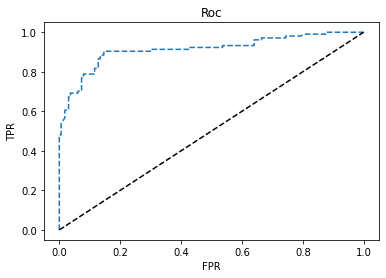

In [19]:
# Roc 곡선을 위한 변수 생성 #
fpr, tpr, thresholds = roc_curve(Y_test, vc.predict_proba(X_test)[:, 1])

# Roc 곡선 #
plt.plot(fpr, tpr, "--")
plt.plot([0, 1], [0, 1], "k--")
plt.plot([fpr], [tpr], "r-", ms = 10)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc")
plt.show()

## 배깅 (Bagging) 이란

- 배깅은 Bootstrap Aggregating의 줄임말
- Bootstrap이란 여러 개의 dataset을 중복을 허용(복원 추출)하여 샘플링하여 분할하는 방식
- Voting은 여러 알고리즘의 조합에 대한 앙상블
- Bagging은 하나의 단일 알고리즘에 대하여 여러 개의 샘플 조합으로 앙상블
- 대표적인 방법 : Random Forest, Bagging


### 배깅 실습

 - base_estimator 
  > - 사용할 모델
 - n_estimators
  > - 500개 동시 학습 # 모형의 갯수(시행할 횟수), 디폴트 10,
 - max_samples 
  > - 들어가는 샘플의 한계 (들어가는 샘플 수는 랜덤임)
 - max_features 
  > - 하나의 예측기가 가져갈 수 있는 최대의 칼럼 갯수
 - bootstrap = True
  > - 복원 추출 여부
 - bootstrap_features = False
  > - 칼럼 중복 사용 여부
 - n_jobs = 1
  > - 사용할 CPU 코어 수 지정 (None(=1)이 기본값, -1로 설정하면 모든 프로세서를 다 사용


#### 라이브러리 및 데이터 불러오기

In [20]:
# 라이브러리 불러오기
from sklearn.ensemble import BaggingClassifier

In [21]:
# 파일 불러오기
data = pd.read_csv("titanic_df.csv")
data = data.drop(labels = "Unnamed: 0", axis = 1)
data

,Sex,Embarked,ToH,Survived,Pclass,Age,Fare,Family
0,0,0,2,0,3,22,7.2500,0
1,1,1,3,1,1,38,71.2833,0
2,1,0,1,1,3,26,7.9250,0
3,1,0,3,1,1,35,53.1000,0
4,0,0,2,0,3,35,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,0,4,0,2,27,13.0000,0
887,1,0,1,1,1,19,30.0000,0
888,1,0,1,0,3,21,23.4500,1
889,0,1,2,1,1,26,30.0000,0


#### 데이터 분할

In [22]:
# X, Y로 변수를 나누기(독립괴 종속 변수)
X = data[['Sex', 'Embarked', 'ToH', 'Pclass', 'Age', 'Fare', 'Family']]
Y = data['Survived']

# 훈련과 테스트로 변수 다시 한번더 나누기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

#### 모델링

In [23]:
# 사용할 base model 선택 및 모델링 # 
#  DecisionTree 모델 사용 
dtree_model = DecisionTreeClassifier(random_state = 5)

# 만든 모델을 기반으로 Bagging Model 설계
bag_model = BaggingClassifier(
  base_estimator = dtree_model, # 사용할 모델
  n_estimators = 500, # 500개 동시 학습 # 모형의 갯수(시행할 횟수), 디폴트 10,
  max_samples = 1.0,  # 들어가는 샘플의 한계 (들어가는 샘플 수는 랜덤임)
  max_features = 1.0, # 하나의 예측기가 가져갈 수 있는 최대의 칼럼 갯수
  bootstrap = True,  # 복원 추출 여부
  bootstrap_features = False, # 칼럼 중복 사용 여부
  n_jobs = -1, # 사용할 CPU 코어 수 지정 (None(=1)이 기본값, -1로 설정하면 모든 프로세서를 다 사용
  random_state = 5  
)

# 모델 학습
bag_model.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=5),
                  n_estimators=500, n_jobs=-1, random_state=5)

#### 모델 평가

In [24]:
# 테스트 데이터로 예측 #
y_pred = bag_model.predict(X_test)

# 정오분포표 #
ac_pd = pd.DataFrame(confusion_matrix(Y_test, y_pred), index = ["Real_True", "Real_False"], columns = ["True_Predict", "False_Predict"])
ac_pd

,True_Predict,False_Predict
Real_True,149,19
Real_False,27,73


In [25]:
# 모델 학습 성능 비교

## accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.
## macro : 단순평균
## weighted : 각 클래스에 속하는 표본의 갯수로 가중평균

print("Classification_Report")
print(classification_report(Y_test, y_pred))

Classification_Report
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       168
           1       0.79      0.73      0.76       100

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



In [26]:
# 직접 확인 
print("< Decision Tree + Bagging >")
print("잘못 분류된 샘플 수 : {}".format((y_pred != Y_test).sum()))
print("정확도(Accuracy) : {}".format(accuracy_score(Y_test, y_pred)))
print("정밀도(Precision) : {}".format(precision_score(y_true = Y_test, y_pred = y_pred)))
print("재현율(Recall) : {}".format(recall_score(y_true = Y_test, y_pred = y_pred)))
print("F1_Score : {}".format(f1_score(y_true = Y_test, y_pred = y_pred)))

< Decision Tree + Bagging >
잘못 분류된 샘플 수 : 46
정확도(Accuracy) : 0.8283582089552238
정밀도(Precision) : 0.7934782608695652
재현율(Recall) : 0.73
F1_Score : 0.7604166666666666


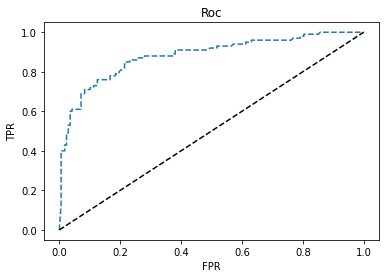

In [27]:
# Roc 곡선을 위한 변수 생성 #
fpr, tpr, thresholds = roc_curve(Y_test, bag_model.predict_proba(X_test)[:, 1])

# Roc 곡선 #
plt.plot(fpr, tpr, "--")
plt.plot([0, 1], [0, 1], "k--")
plt.plot([fpr], [tpr], "r-", ms = 10)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc")
plt.show()

In [28]:
# Auc로 평가 #
clf_labels = ["Decision Tree", "Bagging"]

all_clf = [dtree_model, bag_model]

for clf, label in zip(all_clf, clf_labels) :
  scores = cross_val_score(estimator = clf, X = X_train, y = Y_train, cv = 5, scoring = "roc_auc")
  print("[{}] Roc_Auc : {} (+/- {})".format(label, scores.mean(), scores.std()))

[Decision Tree] Roc_Auc : 0.7725022275656674 (+/- 0.045737067166644614)
[Bagging] Roc_Auc : 0.8646490414347557 (+/- 0.05022114829476499)


### 랜덤포레스트(Random Forest) 실습

- Decision Tree 기반 Bagging 앙상블
- 굉장히 인기있는 앙상블 모델
- 사용성이 쉽고, 성능도 우수
- 단일 분류 알고리즘(DT) 사용
- 무작위로 예측변수 선택하여 모델 구축
- 결과 결합 : 투표(분류), 평균화(예측)
- 나무구조로 표현(X) => 변수의 중요도 제공
- 주요 파라미터
 > - random_state : random seed 고정 값
 > - n_jobs : CPU 사용 갯수
 > - max_depth : 깊어질 수 있는 최대 깊이. 과대적합 방지용
 > - n_estimators : 암상블하는 트리의 갯수
 > - max_features : best split을 판단할 때 최대로 사용할 feature의 갯수 {‘auto’, ‘sqrt’, ‘log2’}. 과대적합 방지용
 > - min_samples_split : 트리가 분할할 때 최소 샘플의 갯수. default=2. 과대적합 방지용


#### 라이브러리 불러오기
- 회귀가 있고 분류가 있음.
- 필요에 따라 잘 구분하여 불러와서 모델링할 필요가 있음.

In [29]:
# 랜덤 포레스트(회귀) 라이브러리 #
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트(분류) 라이브러리 #
from sklearn.ensemble import RandomForestClassifier

#### 모델링

In [30]:
# 모델링
rf_model = RandomForestClassifier(random_state = 5)

# 모델 학습
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=5)

#### 모델 평가

In [31]:
# 테스트 데이터로 예측 #
y_pred = rf_model.predict(X_test)

# 정오분포표 #
ac_pd = pd.DataFrame(confusion_matrix(Y_test, y_pred), index = ["Real_True", "Real_False"], columns = ["True_Predict", "False_Predict"])
ac_pd

,True_Predict,False_Predict
Real_True,148,20
Real_False,27,73


In [32]:
# 모델 학습 성능 비교

## accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.
## macro : 단순평균
## weighted : 각 클래스에 속하는 표본의 갯수로 가중평균

print("Classification_Report(Random Forest)")
print(classification_report(Y_test, y_pred))

Classification_Report(Random Forest)
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       168
           1       0.78      0.73      0.76       100

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [33]:
# 직접 확인 
print("< RandomForest >")
print("잘못 분류된 샘플 수 : {}".format((y_pred != Y_test).sum()))
print("정확도(Accuracy) : {}".format(accuracy_score(Y_test, y_pred)))
print("정밀도(Precision) : {}".format(precision_score(y_true = Y_test, y_pred = y_pred)))
print("재현율(Recall) : {}".format(recall_score(y_true = Y_test, y_pred = y_pred)))
print("F1_Score : {}".format(f1_score(y_true = Y_test, y_pred = y_pred)))

< RandomForest >
잘못 분류된 샘플 수 : 47
정확도(Accuracy) : 0.8246268656716418
정밀도(Precision) : 0.7849462365591398
재현율(Recall) : 0.73
F1_Score : 0.7564766839378239


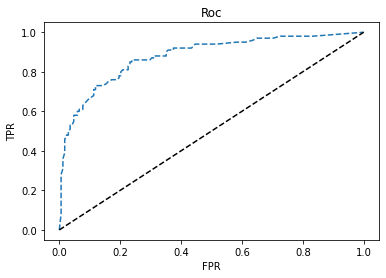

In [34]:
# Roc 곡선을 위한 변수 생성 #
fpr, tpr, thresholds = roc_curve(Y_test, rf_model.predict_proba(X_test)[:, 1])

# Roc 곡선 #
plt.plot(fpr, tpr, "--")
plt.plot([0, 1], [0, 1], "k--")
plt.plot([fpr], [tpr], "r-", ms = 10)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc")
plt.show()

In [35]:
# Roc 곡선의 Auc 값 계산 #
auc_score = cross_val_score(estimator = rf_model, X = X_train, y = Y_train, cv = 5, scoring = "roc_auc")

print("[ Best RandomForest ] Roc_Auc : {} (+/- {})".format(auc_score.mean(), auc_score.std()))

[ Best RandomForest ] Roc_Auc : 0.8701532646551444 (+/- 0.052077495273385954)


#### 최적화 및 재평가

In [36]:
# 돌려볼 매개변수 미리 선언
params = {
  "max_depth" : [3, 4, 5, 6, 7],
  "n_estimators" : [1, 3, 5, 7, 9],
  "max_features" :  [1, 2, 3, 4, 5],
  "min_samples_split" : [2, 4, 6, 8, 10]
  }

In [37]:
# 그리드 서치로 모델링
## GridSearchCV(모델명, param_grid = 미리 선언한 매개변수, scoring = "확인할 평가지표", cv = 교차 검증에서 몇개로 분할되는지 지정, return_train_score = True)
grid_model = GridSearchCV(rf_model, param_grid = params, scoring = "accuracy", cv = 5, return_train_score = True)

# 학습
grid_model.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [1, 3, 5, 7, 9]},
             return_train_score=True, scoring='accuracy')

In [38]:
# 데이터 프레임으로 결과 확인
grid_result_df = pd.DataFrame(grid_model.cv_results_)

# 필요한 칼럼만 가져와서 보기
grid_result_df[["param_max_depth", "param_n_estimators", "param_max_features", "param_min_samples_split", "mean_fit_time", "mean_train_score", "mean_test_score", "rank_test_score"]]

## 확인하면 아래에 정확도가 올라간 것을 확인할 수 있음

,param_max_depth,param_n_estimators,param_max_features,param_min_samples_split,mean_fit_time,mean_train_score,mean_test_score,rank_test_score
0,3,1,1,2,0.012791,0.707476,0.667742,621
1,3,3,1,2,0.015990,0.771666,0.728774,610
2,3,5,1,2,0.019789,0.768044,0.744774,599
3,3,7,1,2,0.026185,0.829442,0.802594,490
4,3,9,1,2,0.039578,0.827032,0.808994,448
...,...,...,...,...,...,...,...,...
620,7,1,5,10,0.006192,0.854726,0.828284,138
621,7,3,5,10,0.011398,0.874394,0.828258,139
622,7,5,5,10,0.016391,0.879607,0.826619,169
623,7,7,5,10,0.020385,0.885227,0.836194,55


In [40]:
# 그리드서치의 베스트 모델을 가져오기
best_rf_model = grid_model.best_estimator_
best_rf_predict = best_rf_model.predict(X_test)
best_accuracy = accuracy_score(Y_test, best_rf_predict)

print("Best RandomForest Accuracy", best_accuracy)

Best RandomForest Accuracy 0.8208955223880597


In [41]:
# 직접 확인 
print("< Best Random Forest >")
print("잘못 분류된 샘플 수 : {}".format((best_rf_predict != Y_test).sum()))
print("정확도(Accuracy) : {}".format(accuracy_score(Y_test, best_rf_predict)))
print("정밀도(Precision) : {}".format(precision_score(y_true = Y_test, y_pred = best_rf_predict)))
print("재현율(Recall) : {}".format(recall_score(y_true = Y_test, y_pred = best_rf_predict)))
print("F1_Score : {}".format(f1_score(y_true = Y_test, y_pred = best_rf_predict)))

< Best Random Forest >
잘못 분류된 샘플 수 : 48
정확도(Accuracy) : 0.8208955223880597
정밀도(Precision) : 0.8023255813953488
재현율(Recall) : 0.69
F1_Score : 0.7419354838709676


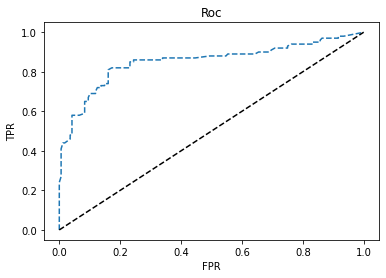

In [42]:
# Roc 곡선을 위한 변수 생성 #
fpr, tpr, thresholds = roc_curve(Y_test, best_rf_model.predict_proba(X_test)[:, 1])

# Roc 곡선 #
plt.plot(fpr, tpr, "--")
plt.plot([0, 1], [0, 1], "k--")
plt.plot([fpr], [tpr], "r-", ms = 10)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc")
plt.show()

In [43]:
# Roc 곡선의 Auc 값 계산 #
auc_score = cross_val_score(estimator = best_rf_model, X = X_train, y = Y_train, cv = 5, scoring = "roc_auc")

# 최적화 전 약 0.865에서 성능 향상 됨
print("[ Best RandomForest ] Roc_Auc : {} (+/- {})".format(auc_score.mean(), auc_score.std()))

[ Best RandomForest ] Roc_Auc : 0.8649150778732546 (+/- 0.05179079363092002)


## 부스팅이란

- 이전 학습에 대하여 잘못 예측된 데이터에 가중치를 부여해 오차를 보완해 나가는 방식
- 성능이 매우 우수
- 잘못된 레이블링이나 아웃라이어에 필요 이상으로 민감 => 전처리가 중요함
- 학습 시간이 오래걸림
- 대표적인 기법 : AdaBoost, GradientBoost, LightGBM, XGBoost

### AdaBoost

참고 : <span> https://injo.tistory.com/31 </span>

- 대표적인 부스팅 알고리즘 중 하나
- 약한 학습기의 오류 데이터에 가중치를 부여하면서 부스팅을 수행
- 속도나 성능적인 측면에서 decision tree를 약한 학습기
- 약한 학습기를 순차적으로 학습시켜, 개별 학습기에 가중치를 부여
- 추후, 모두 결합함으로써 개별 약한 학습기보다 높은 정확도의 예측 결과를 만듦
  
#### 라이브러리 불러오기

파라미터 설명

1. base_estimators
  - 학습에 사용하는 알고리즘
  - Default = None → DecisionTreeClassifier(max_depth=1)가 적용

2. n_estimators
  - 생성할 약한 학습기의 갯수를 지정
  - Default = 50

3. learning_rate
  - 학습을 진행할 때마다 적용하는 학습률(0~1)
  - Weak learner가 순차적으로 오류 값을 보정해나갈 때 적용하는 계수
  - Default = 1.0

In [44]:
# 라이브러리 불러오기
from sklearn.ensemble import AdaBoostClassifier

#### 모델링

In [45]:
# 모델 설계
ada_model = AdaBoostClassifier(n_estimators=30, learning_rate=0.1, random_state=5)

# 모델 학습
ada_model.fit(X_train, Y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=30, random_state=5)

#### 모델 평가

In [46]:
# 테스트 데이터로 예측 #
y_pred = ada_model.predict(X_test)

# 정오분포표 #
ac_pd = pd.DataFrame(confusion_matrix(Y_test, y_pred), index = ["Real_True", "Real_False"], columns = ["True_Predict", "False_Predict"])
ac_pd

,True_Predict,False_Predict
Real_True,145,23
Real_False,35,65


In [47]:
# 모델 학습 성능 비교

## accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.
## macro : 단순평균
## weighted : 각 클래스에 속하는 표본의 갯수로 가중평균

print("Classification_Report(AdaBoost)")
print(classification_report(Y_test, y_pred))

Classification_Report(AdaBoost)
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       168
           1       0.74      0.65      0.69       100

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



In [48]:
# 직접 확인 
print("< AdaBoost >")
print("잘못 분류된 샘플 수 : {}".format((y_pred != Y_test).sum()))
print("정확도(Accuracy) : {}".format(accuracy_score(Y_test, y_pred)))
print("정밀도(Precision) : {}".format(precision_score(y_true = Y_test, y_pred = y_pred)))
print("재현율(Recall) : {}".format(recall_score(y_true = Y_test, y_pred = y_pred)))
print("F1_Score : {}".format(f1_score(y_true = Y_test, y_pred = y_pred)))

< AdaBoost >
잘못 분류된 샘플 수 : 58
정확도(Accuracy) : 0.7835820895522388
정밀도(Precision) : 0.7386363636363636
재현율(Recall) : 0.65
F1_Score : 0.6914893617021277


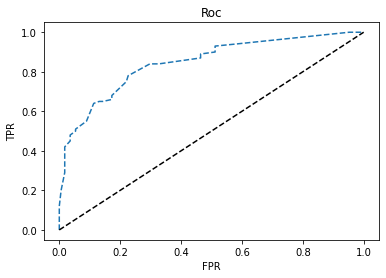

In [49]:
# Roc 곡선을 위한 변수 생성 #
fpr, tpr, thresholds = roc_curve(Y_test, ada_model.predict_proba(X_test)[:, 1])

# Roc 곡선 #
plt.plot(fpr, tpr, "--")
plt.plot([0, 1], [0, 1], "k--")
plt.plot([fpr], [tpr], "r-", ms = 10)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc")
plt.show()

In [50]:
# Roc 곡선의 Auc 값 계산 #
auc_score = cross_val_score(estimator = ada_model, X = X_train, y = Y_train, cv = 5, scoring = "roc_auc")

print("[ Best AdaBoost ] Roc_Auc : {} (+/- {})".format(auc_score.mean(), auc_score.std()))

[ Best AdaBoost ] Roc_Auc : 0.8491189926927708 (+/- 0.0636233596333193)


### Gradient Boost Machine(GBM)

- 성능이 우수함
- 시간이 오래걸림
- 가중치 업데이트를 경사하강법(Gradient Descent)를 이용하여 최적화된 결과를 얻는 알고리즘
- 과적합이 빠르게 됨 (Greedy Algorithm(탐욕 알고리즘) 때문) 

#### 라이브러리 불러오기

파라미터 설명 (이외 여러 파라미터 존재)
1. loss
  - 경사하강법에서 사용할 cost function 지정
  - default = log_loss (버전에 따라 log_loss가 아닌 경우도 있음)
  - 'log_loss', 'deviance', 'exponential'

2. n_estimators	
  - 생성할 트리의 갯수를 지정
  - Default = 100
  - 많을수록 성능은 좋아지지만 시간이 오래 걸림

3. learning_rate	
  - 학습을 진행할 때마다 적용하는 학습률(0~1)
  - Weak learner가 순차적으로 오류 값을 보정해나갈 때 적용하는 계수
  - Default = 0.1
  - 낮은 만큼 최소 오류 값을 찾아 예측성능이 높아질 수 있음
  - 하지만 많은 수의 트리가 필요하고 시간이 많이 소요

4. subsample
  - 개별 트리가 학습에 사용하는 데이터 샘플링 비율(0~1)
  - default=1 (전체 데이터 학습)
  - 이 값을 조절하여 트리 간의 상관도를 줄일 수 있음

In [52]:
# 라이브러리 불러오기
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

#### 모델링

In [53]:
# 모델링
gbm_model = GradientBoostingClassifier(random_state = 5)

# 모델 학습
gbm_model.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=5)

#### 모델 평가

In [56]:
# 테스트 데이터로 예측 #
y_pred = gbm_model.predict(X_test)

# 정오분포표 #
ac_pd = pd.DataFrame(confusion_matrix(Y_test, y_pred), index = ["Real_True", "Real_False"], columns = ["True_Predict", "False_Predict"])
ac_pd

,True_Predict,False_Predict
Real_True,149,19
Real_False,30,70


In [54]:
# 모델 학습 성능 비교

## accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.
## macro : 단순평균
## weighted : 각 클래스에 속하는 표본의 갯수로 가중평균

print("Classification_Report(GBM)")
print(classification_report(Y_test, y_pred))

Classification_Report(GBM)
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       168
           1       0.74      0.65      0.69       100

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



In [55]:
# 직접 확인 
print("< GBM >")
print("잘못 분류된 샘플 수 : {}".format((y_pred != Y_test).sum()))
print("정확도(Accuracy) : {}".format(accuracy_score(Y_test, y_pred)))
print("정밀도(Precision) : {}".format(precision_score(y_true = Y_test, y_pred = y_pred)))
print("재현율(Recall) : {}".format(recall_score(y_true = Y_test, y_pred = y_pred)))
print("F1_Score : {}".format(f1_score(y_true = Y_test, y_pred = y_pred)))

< GBM >
잘못 분류된 샘플 수 : 58
정확도(Accuracy) : 0.7835820895522388
정밀도(Precision) : 0.7386363636363636
재현율(Recall) : 0.65
F1_Score : 0.6914893617021277


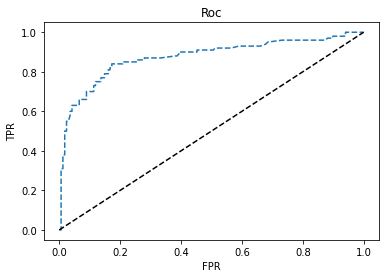

In [58]:
# Roc 곡선을 위한 변수 생성 #
fpr, tpr, thresholds = roc_curve(Y_test, gbm_model.predict_proba(X_test)[:, 1])

# Roc 곡선 #
plt.plot(fpr, tpr, "--")
plt.plot([0, 1], [0, 1], "k--")
plt.plot([fpr], [tpr], "r-", ms = 10)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc")
plt.show()

In [59]:
# Roc 곡선의 Auc 값 계산 #
auc_score = cross_val_score(estimator = gbm_model, X = X_train, y = Y_train, cv = 5, scoring = "roc_auc")

print("[ Best GBM ] Roc_Auc : {} (+/- {})".format(auc_score.mean(), auc_score.std()))

[ Best GBM ] Roc_Auc : 0.86492814829281 (+/- 0.05330023846369056)


### XGBoost(eXtra Gradient Boost)

- scikit-learn 패키지 아님
- 트리 기반의 알고리즘의 앙상블 학습
- 성능이 우수함
- GBM보다는 빠르고 성능(과적합 규제)도 향상됨
- Tree pruning(트리 가지치기) : 긍정 이득이 없는 분할을 가지치기해서 분할 수를 줄임
- 자체 내장된 교차 검증
- 결손값 자체 처리
- 학습 속도가 느림
- 참고 문서 :<span> https://xgboost.readthedocs.io/en/latest/ </span>

#### 라이브러리 불러오기

파라미터 설명은 다음 URL 참고 <span> https://injo.tistory.com/44?category=1068433 </span>

하나하나 작성하기 보다 직접 찾아서 보는게 빠를 듯 싶음

In [ ]:
# 설치 필요
# %pip install xgboost

In [62]:
from xgboost import XGBRegressor, XGBClassifier, plot_importance ## Feature Importance를 불러오기 위함

#### 모델링

기존 사이킷런의 모델들과 파라미터가 다름.

위에 언급한 사이트에서 파라미터 확인 후 튜닝할 필요 있음

In [69]:
# 모델링
xgb_model = XGBClassifier(random_state = 5)

# 모델 학습
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=5,
              reg_alpha=0, reg_lambda=1, ...)

#### 모델 평가

In [70]:
# 테스트 데이터로 예측 #
y_pred = xgb_model.predict(X_test)

# 정오분포표 #
ac_pd = pd.DataFrame(confusion_matrix(Y_test, y_pred), index = ["Real_True", "Real_False"], columns = ["True_Predict", "False_Predict"])
ac_pd

,True_Predict,False_Predict
Real_True,150,18
Real_False,28,72


In [71]:
# 모델 학습 성능 비교

## accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.
## macro : 단순평균
## weighted : 각 클래스에 속하는 표본의 갯수로 가중평균

print("Classification_Report(XGB)")
print(classification_report(Y_test, y_pred))

Classification_Report(XGB)
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       168
           1       0.80      0.72      0.76       100

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



In [72]:
# 직접 확인 
print("< XGB >")
print("잘못 분류된 샘플 수 : {}".format((y_pred != Y_test).sum()))
print("정확도(Accuracy) : {}".format(accuracy_score(Y_test, y_pred)))
print("정밀도(Precision) : {}".format(precision_score(y_true = Y_test, y_pred = y_pred)))
print("재현율(Recall) : {}".format(recall_score(y_true = Y_test, y_pred = y_pred)))
print("F1_Score : {}".format(f1_score(y_true = Y_test, y_pred = y_pred)))

< XGB >
잘못 분류된 샘플 수 : 46
정확도(Accuracy) : 0.8283582089552238
정밀도(Precision) : 0.8
재현율(Recall) : 0.72
F1_Score : 0.7578947368421052


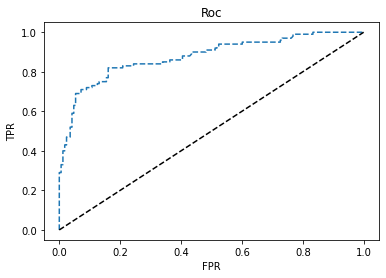

In [73]:
# Roc 곡선을 위한 변수 생성 #
fpr, tpr, thresholds = roc_curve(Y_test, xgb_model.predict_proba(X_test)[:, 1])

# Roc 곡선 #
plt.plot(fpr, tpr, "--")
plt.plot([0, 1], [0, 1], "k--")
plt.plot([fpr], [tpr], "r-", ms = 10)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc")
plt.show()

In [75]:
# Roc 곡선의 Auc 값 계산 #
auc_score = cross_val_score(estimator = xgb_model, X = X_train, y = Y_train, cv = 5, scoring = "roc_auc")

print("[ Best XGB ] Roc_Auc : {} (+/- {})".format(auc_score.mean(), auc_score.std()))

[ Best XGB ] Roc_Auc : 0.8630590782963903 (+/- 0.05787884268766798)


### LightGBM

- scikit-learn 패키지가 아님 (참고 문서 : <span> https://lightgbm.readthedocs.io/en/latest/ </span>)
- 성능이 우수함
- 속도도 매우 빠름
- 카테고리형 피처의 자동 변환과 최적 분할 (원-핫인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드분할 수행)
- 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉬움
- 일반적인 균형트리분할(Level Wise) 방식과 달리 리프중심 트리분할(Leaf Wise) 방식을 사용함
- 리프중심 트리분할 : 트리가 깊어지고 비대칭적으로 생성(예측 오류 손실을 최소화)

#### 라이브러리 불러오기

In [ ]:
# 설치 필요
# %pip install lightgbm

In [77]:
from lightgbm import LGBMRegressor, LGBMClassifier

#### 모델링

In [80]:
# 모델링
lgbm_model = LGBMClassifier(random_state = 5)

# 모델 학습
lgbm_model.fit(X_train, Y_train)

LGBMClassifier(random_state=5)

#### 모델 평가

In [81]:
# 테스트 데이터로 예측 #
y_pred = lgbm_model.predict(X_test)

# 정오분포표 #
ac_pd = pd.DataFrame(confusion_matrix(Y_test, y_pred), index = ["Real_True", "Real_False"], columns = ["True_Predict", "False_Predict"])
ac_pd

,True_Predict,False_Predict
Real_True,148,20
Real_False,23,77


In [82]:
# 모델 학습 성능 비교

## accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.
## macro : 단순평균
## weighted : 각 클래스에 속하는 표본의 갯수로 가중평균

print("Classification_Report(LightGBM))")
print(classification_report(Y_test, y_pred))

Classification_Report(LightGBM))
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       168
           1       0.79      0.77      0.78       100

    accuracy                           0.84       268
   macro avg       0.83      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268



In [83]:
# 직접 확인 
print("< LightGBM >")
print("잘못 분류된 샘플 수 : {}".format((y_pred != Y_test).sum()))
print("정확도(Accuracy) : {}".format(accuracy_score(Y_test, y_pred)))
print("정밀도(Precision) : {}".format(precision_score(y_true = Y_test, y_pred = y_pred)))
print("재현율(Recall) : {}".format(recall_score(y_true = Y_test, y_pred = y_pred)))
print("F1_Score : {}".format(f1_score(y_true = Y_test, y_pred = y_pred)))

< LightGBM >
잘못 분류된 샘플 수 : 43
정확도(Accuracy) : 0.8395522388059702
정밀도(Precision) : 0.7938144329896907
재현율(Recall) : 0.77
F1_Score : 0.7817258883248732


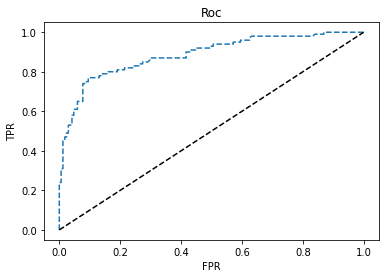

In [84]:
# Roc 곡선을 위한 변수 생성 #
fpr, tpr, thresholds = roc_curve(Y_test, lgbm_model.predict_proba(X_test)[:, 1])

# Roc 곡선 #
plt.plot(fpr, tpr, "--")
plt.plot([0, 1], [0, 1], "k--")
plt.plot([fpr], [tpr], "r-", ms = 10)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc")
plt.show()

In [85]:
# Roc 곡선의 Auc 값 계산 #
auc_score = cross_val_score(estimator = lgbm_model, X = X_train, y = Y_train, cv = 5, scoring = "roc_auc")

print("[ Best LightGBM ] Roc_Auc : {} (+/- {})".format(auc_score.mean(), auc_score.std()))

[ Best LightGBM ] Roc_Auc : 0.8680973436025127 (+/- 0.05004121041701692)
